<a href="https://colab.research.google.com/github/dkim319/NFL_Predictive_Model_NN/blob/master/2_NFL_Prediction_Model_NN_2014_to_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NFL Prediction Neural Network Model - 2014 to 2018 (4 Year)

## Introduction

This is a mini-project leverages the data from the previous project that can be viewed here:

https://github.com/dkim319/NFL_Predictive_Model_v2

The purpose of this mini-project is to build a deep learning model based on the knowledge learned from the Deep Learning and Tensorflow in Practice Specialization courses by DeepLearning.ai.

This is the second notebook goes through the same process with using 4 years of NFL data.  The final model in the project references above uses a 4-year training dataset.

## 1. Setup

All required libraries are loaded and the Tensorflow version is checked.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os

print(tf.__version__)

2.2.0


The function to load the data from Github is created, which will do the necessary data transformations and split the data into training, validation, and testing datasets.

In [0]:
def load_data(start_year, end_year, val_year):

  data = pd.read_csv('https://raw.githubusercontent.com/dkim319/NFL_Predictive_Model_NN/master/Data.csv')

  data = data[data['season'] >= start_year]

  # replace any null values with 0
  data = data.fillna(0)

  # use one-hot coding to replace the favorite and underdog categorical variables
  fav_team = pd.get_dummies(data['favorite'])
  und_team = pd.get_dummies(data['underdog'])

  # use a prefix to distinguish the two categorical variables
  fav_team = fav_team.add_prefix('fav_')
  und_team = und_team.add_prefix('und_')

  # remove the original fields
  data = data.drop('favorite', axis = 1)
  data = data.drop('underdog', axis = 1)

  # add the one-hot coded fields
  data = pd.concat([data, fav_team], axis = 1)
  data = pd.concat([data, und_team], axis = 1)

  # split the dataset into training and testing datasets
  data_train = data[data['season'] <= end_year-1]
  data_train.reset_index()
  data_val = data[data['season'] == end_year]
  data_val.reset_index()
  data_test = data[data['season'] == test_year]
  data_test.reset_index()

  # split training and testing datasets into features and target 
  features_train = data_train.drop('spreadflag', axis = 1)
  target_train = data_train['spreadflag']

  features_val = data_val.drop('spreadflag', axis = 1)
  target_val = data_val['spreadflag']

  features_test = data_test.drop('spreadflag', axis = 1)
  target_test = data_test['spreadflag']

  return features_train, target_train, features_val, target_val, features_test, target_test

## 2. Prep Data for Deep Learning

The load_data function is used to get the data and normalize the data in preparation for neural network.  The data is also normalized using a min/max scaler and converted into ndarrays.  This ensure that the data is ready for a neural network.


In [0]:
start_year = 2014
end_year = 2018
test_year = 2019

features_train, target_train, features_val, target_val, features_test, target_test = load_data(start_year, end_year, test_year)

scaler = MinMaxScaler()
scaler.fit(features_train)

x_train = scaler.transform(features_train).astype('float32')
x_val = scaler.transform(features_val).astype('float32')
x_test = scaler.transform(features_test).astype('float32')

y_train = target_train.to_numpy().astype('float32')
y_val = target_val.to_numpy().astype('float32')
y_test = target_test.to_numpy().astype('float32')

Verify the dimensions of the data.

In [4]:
x_train.shape

(988, 252)

In [5]:
y_train.shape

(988,)

Verify the features (x) and target (y) datasets

In [6]:
x_train[:5,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
y_train[:5]

array([0., 0., 0., 0., 1.], dtype=float32)

## 3. Build the Model

The define_model function is created to be able to initialize a model and be able to configure the epochs and learning rate.  The function also allows for the ability to include a learning rate scheduler and/or a model checkpoint as callbacks.

In [0]:
def define_model(model_number, epoch, learning_rate, lr_cb, cp_cb):

  # set the seed and clear session to ensure consistent results and avoid past models impacting the current model
  tf.keras.backend.clear_session()
  tf.random.set_seed(319)
  np.random.seed(319)
  
  # initialize the callback list
  callback_list = []

  if model_number==1:
    # Define the model
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(64, activation="relu", input_dim=252),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(256, activation="relu"),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(512, activation="relu"),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])
  
  if model_number==2:
    # Define the model
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation="relu", input_dim=252),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])
  
  if model_number==3:
     # Define the model
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation="relu", input_dim=252),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])   

  if model_number==4:
     # Define the model
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation="relu", input_dim=252),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(256, activation="relu"),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])  

  optimizer = tf.keras.optimizers.Adam(lr=learning_rate)

  if lr_cb==True:
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(
        lambda epoch: 1e-8 * 10**(epoch / 20))
    callback_list.append(lr_schedule)
    optimizer = tf.keras.optimizers.Adam(lr=1e-8)

  if cp_cb==True:
    filepath = str(model_number) + "_weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
    filedir = os.path.dirname(filepath)
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    callback_list.append(checkpoint)

  model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
  
  model.summary()

  return model, callback_list

## 4. Parameter Tuning and Training

There are plethora of different parameters to tune, but the possiblities are endless. To keep things simple, the parameter tuned will be the learning rate and network architecture.

The baseline (benchmark) for this model will be a naive baseline where the model selects the underdog everytime.  The baseline will be 50.8%.

This baseline is referenced in this report:

https://github.com/dkim319/NFL_Predictive_Model_v2/blob/master/Report%20-%20David%20Kim%20-%2020190623.pdf



In [0]:
def chart_acc_loss(model_history):

  history = model_history

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

In [10]:
model_number = 1
epoch = 160
learning_rate = 0.001
lr_cb = True
cp_cb = False

model_lr_sched, callback_list = define_model(model_number, epoch, learning_rate, lr_cb, cp_cb)

history = model_lr_sched.fit(x_train,y_train, 
                  epochs=epoch, 
                  validation_data = (x_val,y_val),
                  callbacks=[callback_list])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                16192     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1

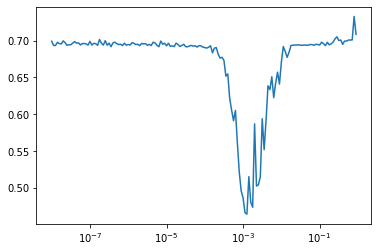

In [11]:
# review the learning rate performance

plt.semilogx(history.history["lr"], history.history["loss"])

plt.show()

Based on the chart, the learning rate of 0.01(10e-3) appears to be the best option, but when a model is trained using this learning rate.  The accuracy and loss charts show instability, which means that the learning rate is probably too high.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                16192     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1

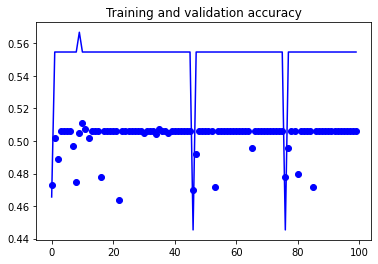

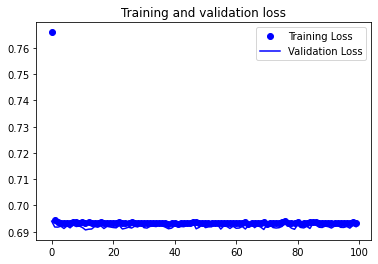

In [12]:
model_number = 1
epoch = 100
learning_rate = 0.01
lr_cb = False
cp_cb = False

model_lr_sched, callback_list = define_model(model_number, epoch, learning_rate, lr_cb, cp_cb)

history = model_lr_sched.fit(x_train,y_train, 
                  epochs=epoch, 
                  validation_data = (x_val,y_val),
                  #callbacks=[callback_list],
                  verbose=0)

# review the learning rate performance

chart_acc_loss(history)

Since the learning rate was too high, the learning rate was adjusted and based on the accuracy/loss charts and validation accuracy.  The learning rate of 0.0001 was selected, which is the same as the 7-year model.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                16192     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1

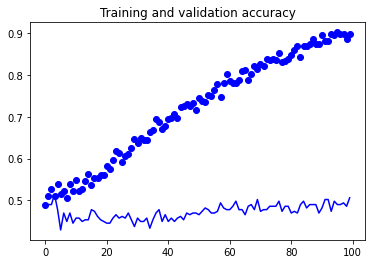

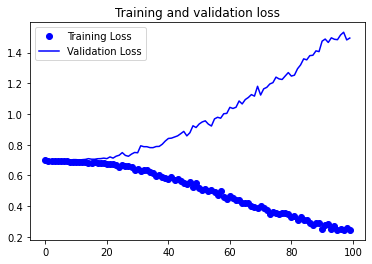

In [13]:
model_number = 1
epoch = 100
learning_rate = 0.0001
lr_cb = False
cp_cb = False

model_lr, callback_list = define_model(model_number, epoch, learning_rate, lr_cb, cp_cb)

history = model_lr.fit(x_train,y_train, 
                  epochs=epoch, 
                  validation_data = (x_val,y_val),
                  #callbacks=[callback_list],
                  verbose=0)

# review the learning rate performance

chart_acc_loss(history)

## Training and Tuning the Archictecture

There was not an efficient way to adjust the architecture (model layers), so multiple variations were tested.  The training accuracy, validation accuracy, and epochs were used to evaluate which model to select.  Checkpoint callback was used to save the weights from the epoch with the highest validation accuracy.

Since this step can be endless as there are an infinite number of layer combinations, three were selected.  The models selected had the highest validation accuracy and had a higher training accuracy than validation accuracy.  This meant that the models were overfitted, but an overfitted model is better than an underfitted model.  Also, the model selected reached their best validation accuracy after 5 epochs, which ensured that enough training occurred.





Model #2 Architecture:

    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation="relu", input_dim=252),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])

* Epoch - 19
* Training Accuracy - 0.5898
* Validation Accuracy - 0.56275


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               32384     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

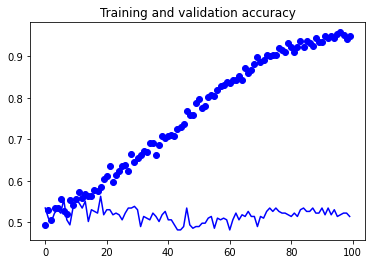

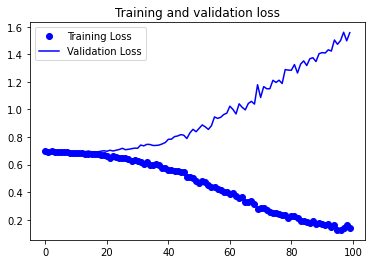

In [14]:
model_number = 2
epoch = 100
learning_rate = 0.0001
lr_cb = False
cp_cb = True

model_2, callback_list = define_model(model_number, epoch, learning_rate, lr_cb, cp_cb)

history = model_2.fit(x_train,y_train, 
                  epochs=epoch, 
                  validation_data = (x_val,y_val),
                  callbacks=[callback_list])

# review the learning rate performance
chart_acc_loss(history)

Model #3 Architecture:

    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation="relu", input_dim=252),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])   

* Epoch - 77
* Training Accuracy - 0.8570
* Validation Accuracy - 0.56275

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               32384     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 49,025
Trainable params: 49,025
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
26/31 [========================>.....] - ETA: 0s - loss: 0.7055 - accuracy: 0.5120
Epoch 00001: val_accura

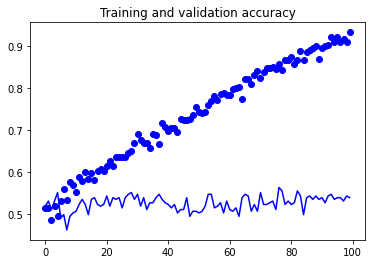

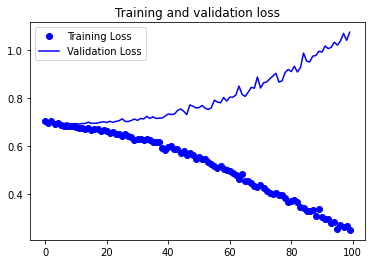

In [15]:
model_number = 3
epoch = 100
learning_rate = 0.0001
lr_cb = False
cp_cb = True

model_3, callback_list = define_model(model_number, epoch, learning_rate, lr_cb, cp_cb)

history = model_3.fit(x_train,y_train, 
                  epochs=epoch, 
                  validation_data = (x_val,y_val),
                  callbacks=[callback_list])

# review the learning rate performance
chart_acc_loss(history)

Evaluate the model against the test set

Model #4 Architecture:

    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation="relu", input_dim=252),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(256, activation="relu"),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])  

* Epoch - 37
* Training Accuracy - 0.7325
* Validation Accuracy - 0.54656

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               32384     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 65,665
Trainable params: 65,665
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
22/31 [====================>.........] - ETA: 0s - loss: 0.7005 - accuracy: 0.4844
Epoch 00001: val_accura

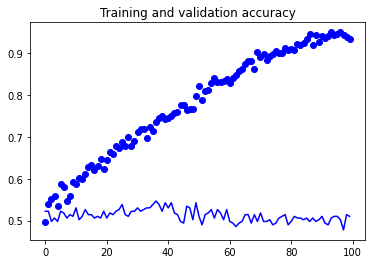

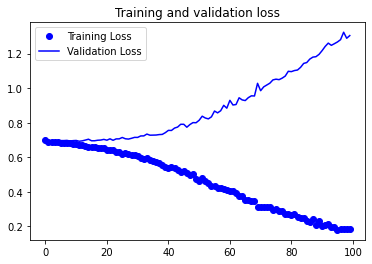

In [16]:
model_number = 4
epoch = 100
learning_rate = 0.0001
lr_cb = False
cp_cb = True

model_4, callback_list = define_model(model_number, epoch, learning_rate, lr_cb, cp_cb)

history = model_4.fit(x_train,y_train, 
                  epochs=epoch, 
                  validation_data = (x_val,y_val),
                  callbacks=[callback_list])

# review the learning rate performance
chart_acc_loss(history)

### Evaluate against the Test set

The model is evaluated against the test set to determine if the models can generalize well to new data.

In order to do this, the weights saved for each model are loaded into a new model instance, which would be similar to how a model would be implemented in "production".

In [17]:
# define the model parameters
model_number = 2
epoch = 100
learning_rate = 0.0001
lr_cb = False
cp_cb = False

# create a new model instance
model_2, callback_list = define_model(model_number, epoch, learning_rate, lr_cb, cp_cb)

# load weights
model_2.load_weights('/content/2_weights-improvement-19-0.56.hdf5')

# verify the model performance by verifiying the validation accuracy
model_2.evaluate(x_val,y_val)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               32384     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

[0.6969975829124451, 0.5627530217170715]

In [18]:
# Evaluate the test set performance
model_2.evaluate(x_test,y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.7046 - accuracy: 0.4634


[0.7046247124671936, 0.46341463923454285]

In [19]:
# define the model parameters
model_number = 3
epoch = 100
learning_rate = 0.0001
lr_cb = False
cp_cb = False

# create a new model instance
model_3, callback_list = define_model(model_number, epoch, learning_rate, lr_cb, cp_cb)

# load weights
model_3.load_weights('/content/3_weights-improvement-77-0.56.hdf5')

# verify the model performance by verifiying the validation accuracy
model_3.evaluate(x_val,y_val)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               32384     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 49,025
Trainable params: 49,025
Non-trainable params: 0
_________________________________________________________________
8/8 [==============================] - 0s 1ms/step - loss: 0.8660 - accuracy: 0.5628


[0.8659567832946777, 0.5627530217170715]

In [20]:
# Evaluate the test set performance
model_3.evaluate(x_test,y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.9002 - accuracy: 0.4715


[0.9001762866973877, 0.47154471278190613]

In [21]:
# define the model parameters
model_number = 4
epoch = 100
learning_rate = 0.0001
lr_cb = False
cp_cb = False

# create a new model instance
model_4, callback_list = define_model(model_number, epoch, learning_rate, lr_cb, cp_cb)

# load weights
model_4.load_weights('/content/4_weights-improvement-37-0.55.hdf5')

# verify the model performance by verifiying the validation accuracy
model_4.evaluate(x_val,y_val)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               32384     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 65,665
Trainable params: 65,665
Non-trainable params: 0
_________________________________________________________________
8/8 [==============================] - 0s 2ms/step - loss: 0.7287 - accuracy: 0.5466


[0.7286739349365234, 0.546558678150177]

In [22]:
# Evaluate the test set performance
model_4.evaluate(x_test,y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.7381 - accuracy: 0.4634


[0.7380712032318115, 0.46341463923454285]

In summary, there are the accuracy for the three models:

Model #2
* Training Accuracy - 0.5898
* Validation Accuracy - 0.56275
* Testing Accuracy - 0.4634

Model #3
* Training Accuracy - 0.8570
* Validation Accuracy - 0.56275
* Testing Accuracy - 0.4715

Model #4
* Training Accuracy - 0.7325
* Validation Accuracy - 0.54656
* Testing Accuracy - 0.4634

### Train and Evaluate a Rolling 4-Year Models

The rolling 4-year models were evaluated using a training dataset of 2015 to 2018 and testing against 2019 dataset.

A modified load_data function is to adjust the datasets to training and testing datasets.

In [0]:
def load_data_rolling(start_year, target_year):

  data = pd.read_csv('https://raw.githubusercontent.com/dkim319/NFL_Predictive_Model_NN/master/Data.csv')

  data = data[data['season'] >= start_year]

  # replace any null values with 0
  data = data.fillna(0)

  # use one-hot coding to replace the favorite and underdog categorical variables
  fav_team = pd.get_dummies(data['favorite'])
  und_team = pd.get_dummies(data['underdog'])

  # use a prefix to distinguish the two categorical variables
  fav_team = fav_team.add_prefix('fav_')
  und_team = und_team.add_prefix('und_')

  # remove the original fields
  data = data.drop('favorite', axis = 1)
  data = data.drop('underdog', axis = 1)

  # add the one-hot coded fields
  data = pd.concat([data, fav_team], axis = 1)
  data = pd.concat([data, und_team], axis = 1)

  #print data.head(5)
  #print(data.describe())

  # split the dataset into training and testing datasets
  data_train = data[data['season'] <= target_year-1]
  data_train.reset_index()
  data_test = data[data['season'] == target_year]
  data_test.reset_index()

  # split training and testing datasets into features and target 
  features_train = data_train.drop('spreadflag', axis = 1)
  target_train = data_train['spreadflag']

  features_test = data_test.drop('spreadflag', axis = 1)
  target_test = data_test['spreadflag']

  return data_train, data_test, features_train, target_train, features_test, target_test

The data is loaded using the new function.

In [0]:
start_year = 2015
test_year = 2019

data_train, data_test, features_train, target_train, features_test, target_test = load_data_rolling(start_year, test_year)

scaler = MinMaxScaler()
scaler.fit(features_train)

x_train = scaler.transform(features_train).astype('float32')
x_test = scaler.transform(features_test).astype('float32')

y_train = target_train.to_numpy().astype('float32')
y_test = target_test.to_numpy().astype('float32')

In [25]:
model_number = 2
epoch = 19
learning_rate = 0.0001
lr_cb = False
cp_cb = False

model_2_rolling, callback_list = define_model(model_number, epoch, learning_rate, lr_cb, cp_cb)

history = model_2_rolling.fit(x_train,y_train, 
                  epochs=epoch)

# Evaluate the test set performance
print('Model' + str(model_number) + ' - 2019 accuracy')
model_2_rolling.evaluate(x_test,y_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               32384     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

[0.7045849561691284, 0.5203251838684082]

In [26]:
model_number = 3
epoch = 77
learning_rate = 0.0001
lr_cb = False
cp_cb = False

model_3_rolling, callback_list = define_model(model_number, epoch, learning_rate, lr_cb, cp_cb)

history = model_3_rolling.fit(x_train,y_train, 
                  epochs=epoch)

# Evaluate the test set performance
print('Model' + str(model_number) + ' - 2019 accuracy')
model_3_rolling.evaluate(x_test,y_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               32384     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 49,025
Trainable params: 49,025
Non-trainable params: 0
_________________________________________________________________
Epoch 1/77
31/31 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.5112
Epoch 2/77
31/31 [==

[0.8707537651062012, 0.49593496322631836]

In [27]:
model_number = 4
epoch = 37
learning_rate = 0.0001
lr_cb = False
cp_cb = False

model_4_rolling, callback_list = define_model(model_number, epoch, learning_rate, lr_cb, cp_cb)

history = model_4_rolling.fit(x_train,y_train, 
                  epochs=epoch)

# Evaluate the test set performance
print('Model' + str(model_number) + ' - 2019 accuracy')
model_3_rolling.evaluate(x_test,y_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               32384     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 65,665
Trainable params: 65,665
Non-trainable params: 0
_________________________________________________________________
Epoch 1/37
31/31 [==============================] - 0s 2ms/step - loss: 0.7052 - accuracy: 0.4919
Epoch 2/37
31/31 [==

[0.8707537651062012, 0.49593496322631836]

In summary, there are the accuracy for the three models:

Model #2

* Training Accuracy - 0.5620
* Testing Accuracy - 0.5203

Model #3

* Training Accuracy - 0.8496
* Testing Accuracy - 0.4959

Model #4

* Training Accuracy - 0.7378
* Testing Accuracy - 0.4959

## Summary


The first set of models performed poorly against the test dataset.  All three models performed worse than the baseline.  The second set of models using a rolling 4-year training dataset also performed similarly against the test dataset with the exception of the model #2, which had 52.03%.

This type of result was not surprising since the dyanmic nature of the NFL data where the relationship between the feature and target variables will change from season to season.

## Next Steps

The next steps is to monitor the models using the 7-year and 4-year rolling training datasets to see how well they fare against the next NFL season.